<a href="https://colab.research.google.com/github/akanksha-patil1404/Digit-Classification/blob/main/Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train,y_train),(X_test, y_test)=keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

<Figure size 432x288 with 0 Axes>

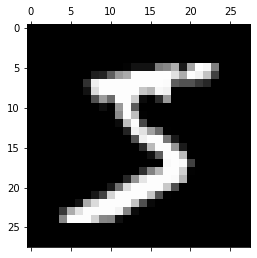

In [ ]:
plt.gray()
plt.matshow(X_train[0])

In [ ]:
y_train[0]

5

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [ ]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
model=keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4678 - accuracy: 0.8776
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3040 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2832 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2730 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2672 - accuracy: 0.9263


In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2706 - accuracy: 0.9243


[0.270580917596817, 0.9243000149726868]

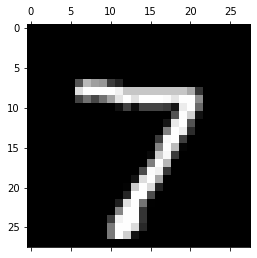

In [ ]:
plt.matshow(X_test[0])

In [ ]:
y_predicted=model.predict(X_test_flattened)
y_predicted[0]

array([2.8930068e-02, 1.9796266e-07, 6.4134538e-02, 9.5956314e-01,
       2.9612482e-03, 1.1500323e-01, 1.4262315e-06, 9.9976730e-01,
       7.3718756e-02, 6.7556274e-01], dtype=float32)

In [ ]:
np.argmax(y_predicted[0])

7

In [ ]:
y_predicted_label=[np.argmax(i) for i in y_predicted]
y_predicted_label[:5]

[7, 2, 1, 0, 4]

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    1,    2,    0,    4,    2,    2,    1,    0],
       [   0, 1112,    2,    2,    0,    1,    4,    2,   12,    0],
       [   9,    9,  918,   19,    7,    3,   10,   10,   42,    5],
       [   5,    0,   19,  918,    0,   28,    2,   10,   19,    9],
       [   2,    1,    7,    2,  909,    0,    6,    4,    8,   43],
       [  12,    1,    4,   34,    8,  781,   10,    5,   29,    8],
       [  18,    3,    9,    1,    8,   15,  900,    2,    2,    0],
       [   2,    5,   22,    6,    7,    0,    0,  944,    2,   40],
       [  11,    7,    6,   24,    9,   30,    8,   11,  857,   11],
       [  11,    7,    1,    9,   18,    7,    0,   16,    4,  936]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

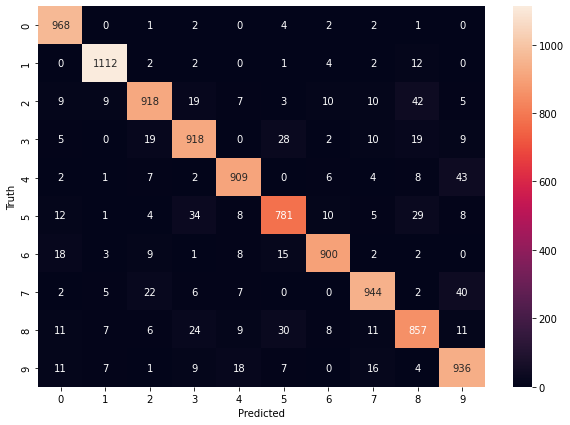

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(100,activation='relu'),
                        keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2734 - accuracy: 0.9227
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1228 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0866 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0660 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0526 - accuracy: 0.9838


In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0780 - accuracy: 0.9763


[0.0780029147863388, 0.9763000011444092]